In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "sex",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income"]

In [5]:
data = pd.read_csv("data/adult.csv", header=None, names=columns)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
x = data.drop("income", axis=1)
y = data["income"]

In [8]:
print(y.unique())

[' <=50K' ' >50K']


In [9]:
y = np.array([0 if i == " <=50K" else 1 for i in y])

In [10]:
y.shape, x.shape

((32561,), (32561, 14))

In [11]:
for i in x:
    if x[i].dtypes == "object":
        tobe = pd.get_dummies(x[i], prefix=i + "_")
        x = x.join(tobe)
        x.drop(i, axis=1, inplace=True)

In [12]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass__ ?,workclass__ Federal-gov,workclass__ Local-gov,workclass__ Never-worked,...,native_country__ Portugal,native_country__ Puerto-Rico,native_country__ Scotland,native_country__ South,native_country__ Taiwan,native_country__ Thailand,native_country__ Trinadad&Tobago,native_country__ United-States,native_country__ Vietnam,native_country__ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x.shape

(32561, 108)

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 108 entries, age to native_country__ Yugoslavia
dtypes: int64(6), uint8(102)
memory usage: 4.7 MB


In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.1)

In [16]:
train_data.shape, train_labels.shape

((29304, 108), (29304,))

In [17]:
test_data.shape, test_labels.shape

((3257, 108), (3257,))

## Helper functions

In [18]:
def train_model(model, verbose=True):
    model.fit(train_data, train_labels)
    predicted = model.predict(test_data)
    acc = metrics.accuracy_score(test_labels, predicted)
    recall = metrics.recall_score(test_labels, predicted)
    precision = metrics.precision_score(test_labels, predicted)
    f1 = metrics.f1_score(test_labels, predicted)
    if verbose:
        print("Accuracy:", acc)
        print("F1 Score:", f1)
        print("Recall:", recall)
        print("Precision:", precision)
        print("Misclassification {0:.2f}%".format((1 - acc) * 100))
        cf = metrics.confusion_matrix(test_labels, predicted)
        print("Classification Report:\n")
        print(metrics.classification_report(test_labels, predicted))
        print("Confusion matrix")
        sns.heatmap(cf, annot=True)

    return acc

records = {}

## Decision Tree Classifier

Accuracy: 0.8173165489714461
F1 Score: 0.6297448662103299
Recall: 0.6470588235294118
Precision: 0.6133333333333333
Misclassification 18.27%
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2475
           1       0.61      0.65      0.63       782

    accuracy                           0.82      3257
   macro avg       0.75      0.76      0.75      3257
weighted avg       0.82      0.82      0.82      3257

Confusion matrix


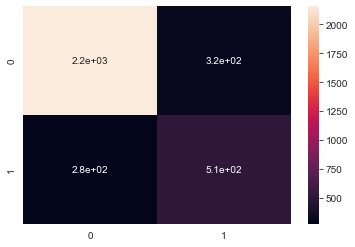

In [19]:
model_1 = DecisionTreeClassifier(criterion="entropy")
model_1_acc = train_model(model_1)

records["Decision Tree Classifier"] = model_1_acc

## Random Forest Classifier

Accuracy: 0.8603008903899294
F1 Score: 0.6846846846846846
Recall: 0.6317135549872123
Precision: 0.7473524962178517
Misclassification 13.97%
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2475
           1       0.75      0.63      0.68       782

    accuracy                           0.86      3257
   macro avg       0.82      0.78      0.80      3257
weighted avg       0.86      0.86      0.86      3257

Confusion matrix


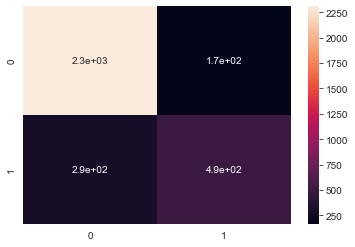

In [20]:
model_2 = RandomForestClassifier()
model_2_acc = train_model(model_2)
records["Random Forest Classifier"] = model_2_acc

## KNN Classifier

Accuracy: 0.7939821922014123
F1 Score: 0.3504356243949661
Recall: 0.23145780051150894
Precision: 0.7211155378486056
Misclassification 20.60%
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2475
           1       0.72      0.23      0.35       782

    accuracy                           0.79      3257
   macro avg       0.76      0.60      0.61      3257
weighted avg       0.78      0.79      0.75      3257

Confusion matrix


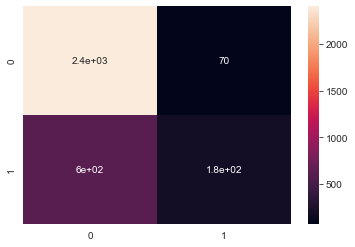

In [21]:
best_acc = 0.0
nn = -1
for i in range(1, 11):
    model_3 = KNeighborsClassifier(n_neighbors=i)
    val = train_model(model_3, verbose=False)
    if best_acc < val:
        best_acc = val
        nn = i
model_3_acc = train_model(KNeighborsClassifier(n_neighbors=nn))

records["KNN Classifier"] = model_3_acc

## Logistic Regression

Accuracy: 0.802886091495241
F1 Score: 0.3874045801526718
Recall: 0.2595907928388747
Precision: 0.7631578947368421
Misclassification 19.71%
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2475
           1       0.76      0.26      0.39       782

    accuracy                           0.80      3257
   macro avg       0.78      0.62      0.63      3257
weighted avg       0.80      0.80      0.76      3257

Confusion matrix


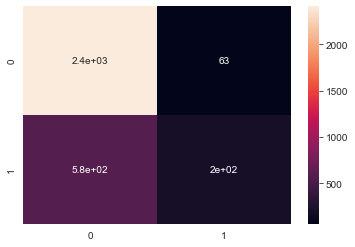

In [22]:
model_4 = LogisticRegression()
model_4_acc = train_model(model_4)

records["Logistic Regression"] = model_4_acc

## SVM CLassifier

Accuracy: 0.854467301197421
F1 Score: 0.6570188133140377
Recall: 0.5805626598465473
Precision: 0.7566666666666667
Misclassification 14.55%
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2475
           1       0.76      0.58      0.66       782

    accuracy                           0.85      3257
   macro avg       0.82      0.76      0.78      3257
weighted avg       0.85      0.85      0.85      3257

Confusion matrix


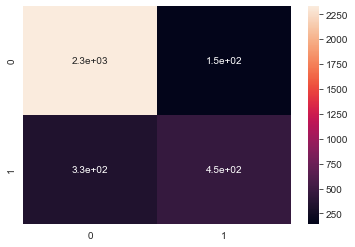

In [23]:
model_5 = make_pipeline(StandardScaler(), SVC())
model_5_acc = train_model(model_5)

records["SVM Classifier"] = model_5_acc

## Result

In [24]:
resulted_acc = pd.DataFrame({"Model": records.keys(), "Accuracy": records.values()}, [i for i in range(len(records))])
resulted_acc

,Model,Accuracy
0,Decision Tree Classifier,0.817317
1,Random Forest Classifier,0.860301
2,KNN Classifier,0.793982
3,Logistic Regression,0.802886
4,SVM Classifier,0.854467


## Best model

In [25]:
print("Best Model {} with Accuracy: {} %".format("Random Forest Classifier", max(resulted_acc.Accuracy) * 100))

Best Model Random Forest Classifier with Accuracy: 86.03008903899294 %
